In [49]:
!unzip /content/drive/MyDrive/kaggle_data/bike-sharing-demand.zip -d bike

In [50]:
import pandas as pd
train_df = pd.read_csv('/content/bike/train.csv')
test_df = pd.read_csv('/content/bike/test.csv')
submission_df = pd.read_csv('/content/bike/sampleSubmission.csv')

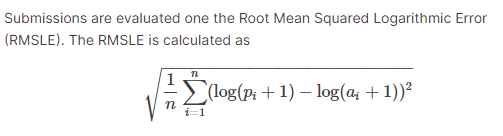

\\(n\\) is the number of hours in the test set

\\(p_i\\) is your predicted count

\\(a_i\\) is the actual count

\\(\log(x)\\) is the natural logarithm

In [51]:
train_df.shape, test_df.shape, submission_df.shape

((10886, 12), (6493, 9), (6493, 2))

In [52]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


피처 엔지니어링

In [56]:
# 문자형 날자를 년 월 일 시 분 초로 나눠보자
train_df['datetime'] = pd.to_datetime( train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second

In [57]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [58]:
# 요일  0 월요일 ~ 6 일요일
import datetime
datetime.date(2024, 5, 5).weekday()
train_df['weekday'] = train_df.apply(lambda x: datetime.date(x.year, x.month, x.day).weekday(), axis=1)

In [59]:
train_df['weekday'] = train_df.apply(lambda x: datetime.date(x.year, x.month, x.day).weekday(), axis=1)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
train_df['weekday_str'] = train_df['weekday'].apply(lambda x: days[x])

In [60]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday,weekday_str
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,Saturday


In [61]:
season_str = ['Spring','Summer','Fall','Winter']
train_df['season_str'] = train_df.season.apply(lambda x: season_str[x-1])

In [62]:
train_df['weather_str'] = train_df['weather'].map({
    1: 'Clear',
    2: 'Mist Few clouds',
    3: 'Light Snow, Rain, Thunderstom',
    4: 'Heavy Snow, Rain, Thunderstom, Fog'
})


In [63]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,year,month,day,hour,minute,second,weekday,weekday_str,season_str,weather_str
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2011,1,1,0,0,0,5,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,2011,1,1,1,0,0,5,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2011,1,1,2,0,0,5,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2011,1,1,3,0,0,5,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2011,1,1,4,0,0,5,Saturday,Spring,Clear


In [64]:
#  세분화된 피처를 더 큰 부류로 묶으면 성능이 향상되는 경우가 있음
drop_list = ['datetime', 'month', 'season', 'weather', 'weekday','minute',	'second']
train_df_2 =  train_df.drop(drop_list, axis=1)

In [65]:
train_df_2.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,weekday_str,season_str,weather_str
0,0,0,9.84,14.395,81,0.0,3,13,16,2011,1,0,Saturday,Spring,Clear
1,0,0,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,Spring,Clear


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

분포도 : 수치형 데이터의 집계값

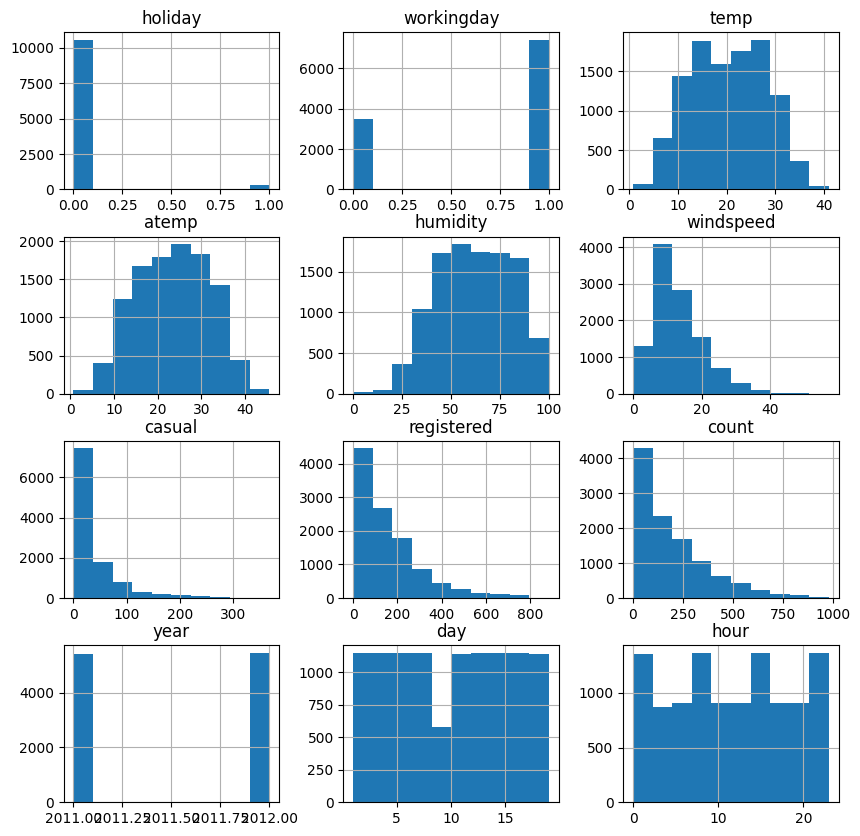

In [67]:
train_df_2.hist(figsize=(10,10))
plt.show()

<ipython-input-68-ed3c6ee59757>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_2['count'])


<Axes: xlabel='count', ylabel='Density'>

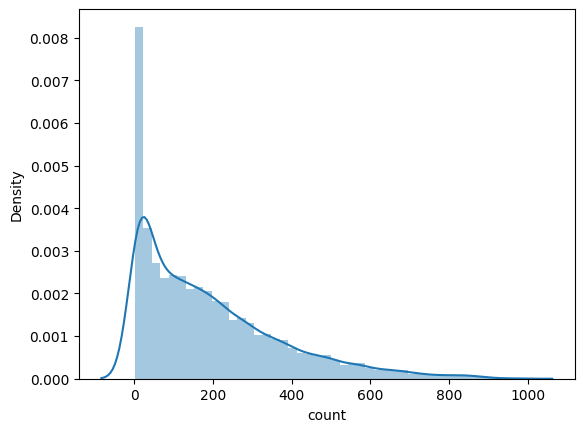

In [68]:
sns.distplot(train_df_2['count'])

In [69]:
# 회귀모델이 좋은 성능을 나타내려면 데이터가 정규분포를 따라야 한다.
# 현재 정규분포를 따르지 않음 - 좋은 성능을 기대 할 수가 없다
# 데이터를 정규분포 형태로 가장 많이 사용: 로그변환

<ipython-input-70-356f4cef36bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df_2['count']))


<Axes: xlabel='count', ylabel='Density'>

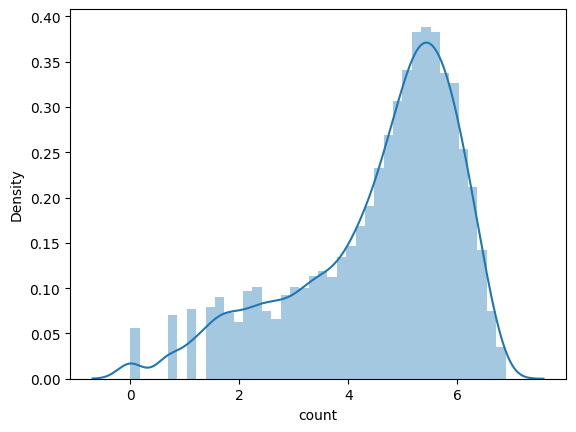

In [70]:
import numpy as np
sns.distplot(np.log(train_df_2['count']))

In [71]:
# count -> 로그변환 -> 지수변환

막대그래프

In [72]:
train_df_2.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,weekday_str,season_str,weather_str
0,0,0,9.84,14.395,81,0.0,3,13,16,2011,1,0,Saturday,Spring,Clear
1,0,0,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,Spring,Clear


<Axes: xlabel='weather_str', ylabel='count'>

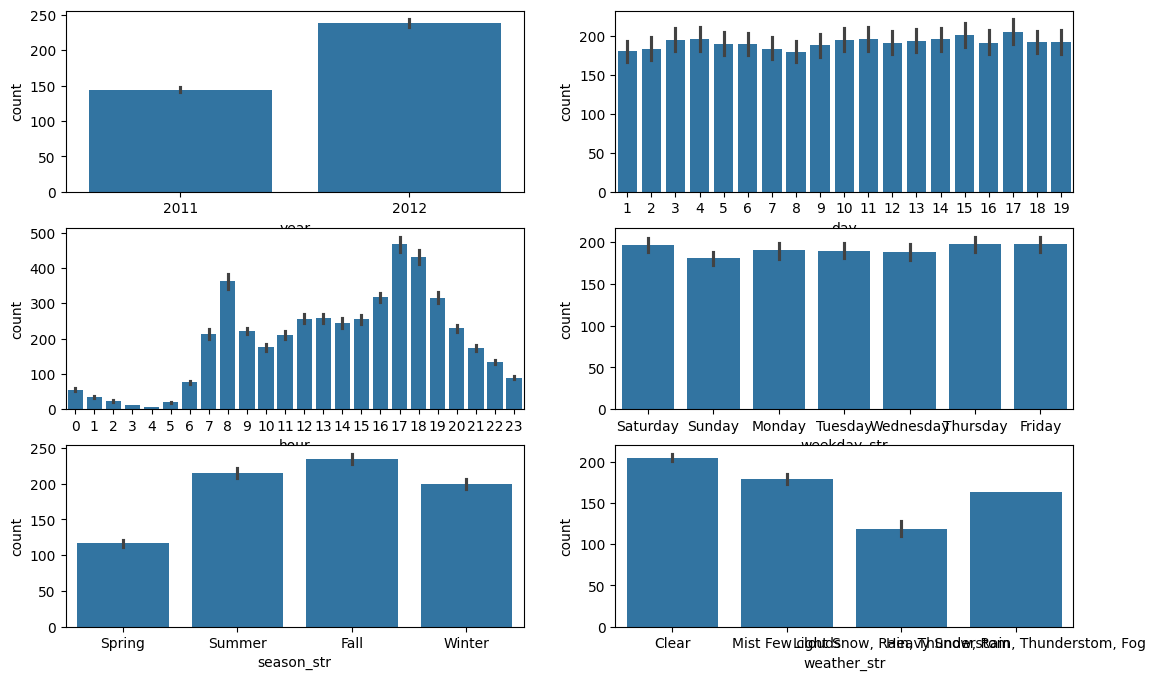

In [73]:
plt.figure(figsize=(13,8))
plt.subplot(3,2,1)
sns.barplot(x='year',y='count',data=train_df_2)
plt.subplot(3,2,2)
sns.barplot(x='day',y='count',data=train_df_2)
plt.subplot(3,2,3)
sns.barplot(x='hour',y='count',data=train_df_2)
plt.subplot(3,2,4)
sns.barplot(x='weekday_str',y='count',  data=train_df_2)
plt.subplot(3,2,5)
sns.barplot(x='season_str',y='count',  data=train_df_2)
plt.subplot(3,2,6)
sns.barplot(x='weather_str',y='count',  data=train_df_2)


<Axes: >

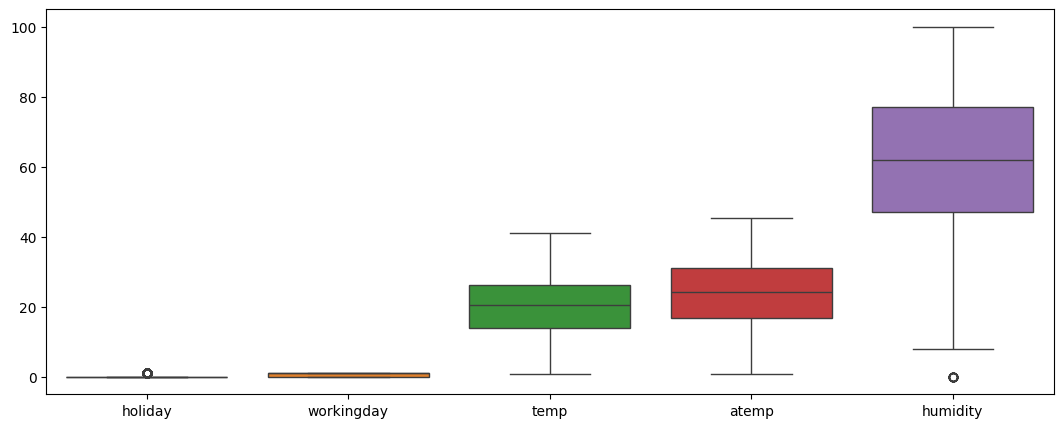

In [74]:
plt.figure(figsize=(13,5))
sns.boxplot(data=train_df_2.iloc[:,:5])

<Axes: >

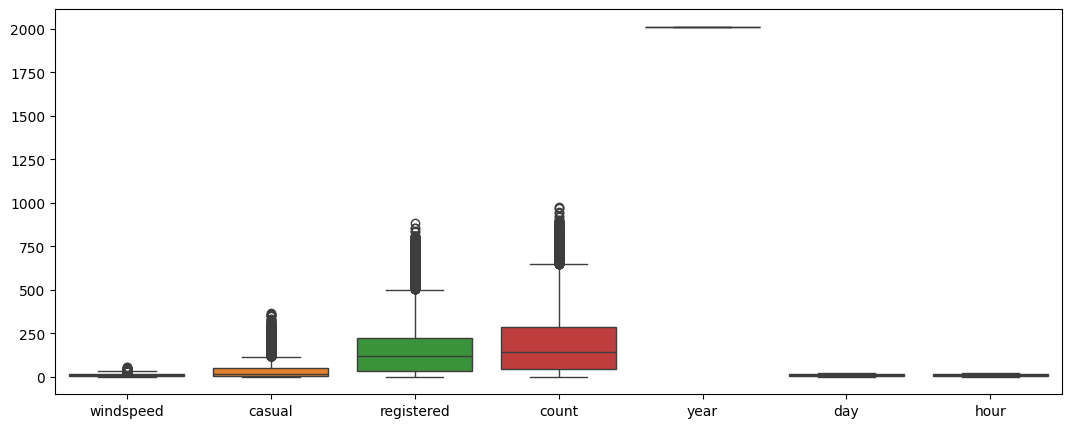

In [75]:
plt.figure(figsize=(13,5))
sns.boxplot(data=train_df_2.iloc[:,5:])

In [76]:
train_df_2.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,weekday_str,season_str,weather_str
0,0,0,9.84,14.395,81,0.0,3,13,16,2011,1,0,Saturday,Spring,Clear
1,0,0,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,Spring,Clear


<Axes: xlabel='hour', ylabel='count'>

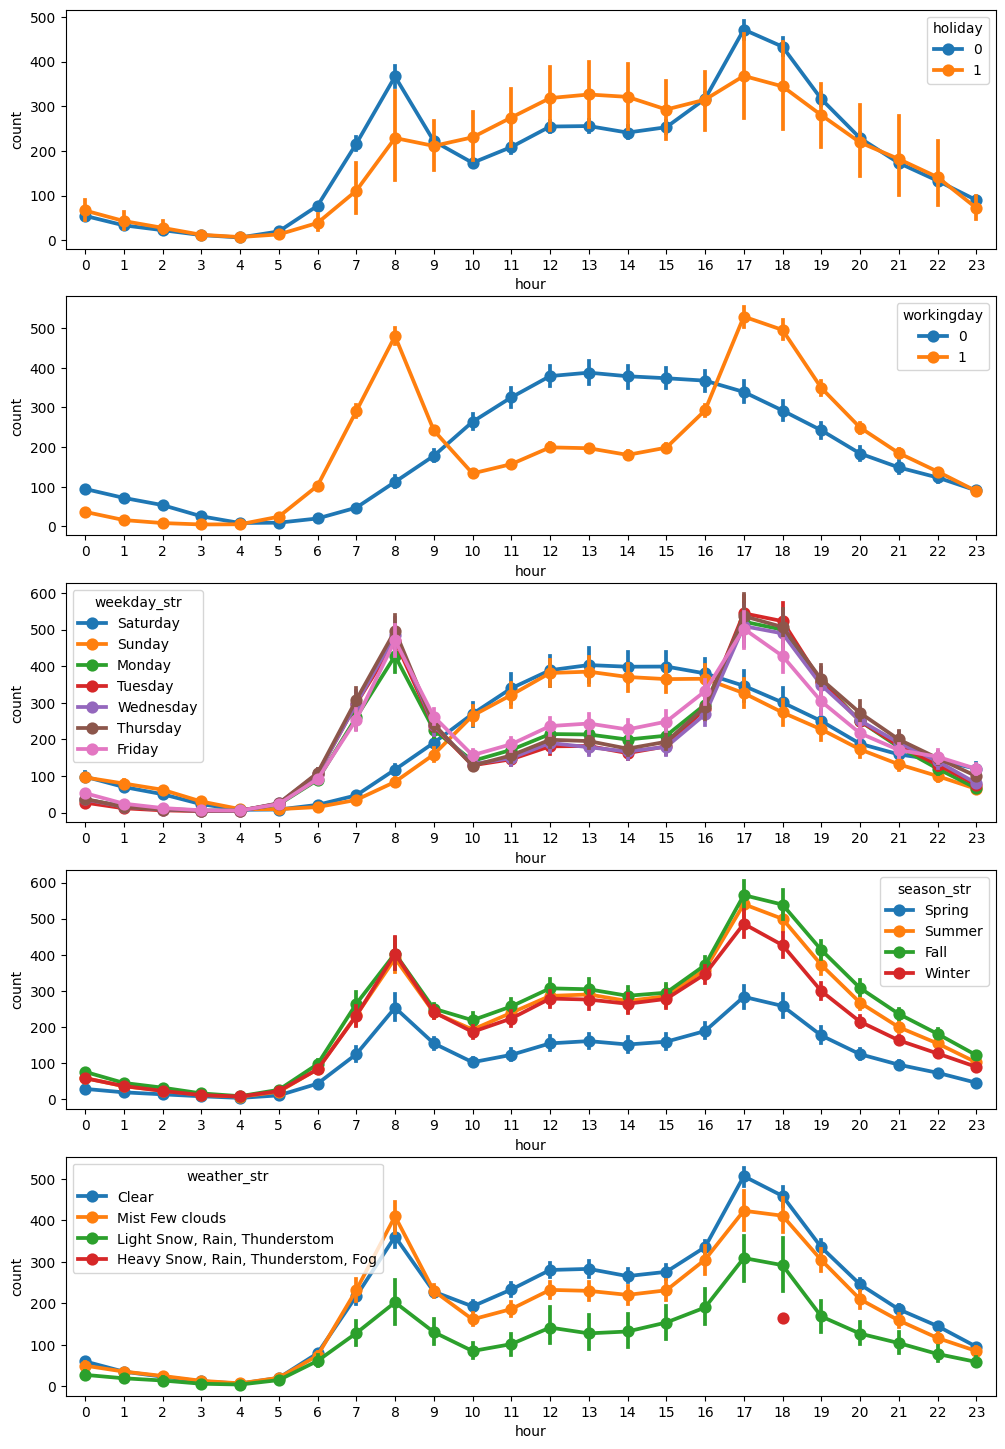

In [77]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)
sns.pointplot(x='hour',y='count', hue='holiday',data=train_df_2, ax=axes[0])
sns.pointplot(x='hour',y='count', hue='workingday',data=train_df_2, ax=axes[1])
sns.pointplot(x='hour',y='count', hue='weekday_str',data=train_df_2, ax=axes[2])
sns.pointplot(x='hour',y='count', hue='season_str',data=train_df_2, ax=axes[3])
sns.pointplot(x='hour',y='count', hue='weather_str',data=train_df_2, ax=axes[4])

In [78]:
# weather 는 4인 데이터는 제거

In [79]:
import pandas as pd
train_df = pd.read_csv('/content/bike/train.csv')
test_df = pd.read_csv('/content/bike/test.csv')
train_df = train_df[train_df.weather != 4]

In [80]:
all_data_temp = pd.concat([train_df, test_df])

In [81]:
all_data_temp.reset_index(drop=True, inplace=True)
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [82]:
# 피처 추가

In [83]:
all_data_temp['datetime'] = pd.to_datetime(all_data_temp['datetime'])

In [84]:
all_data_temp['year'] = all_data_temp['datetime'].dt.year
all_data_temp['month'] = all_data_temp['datetime'].dt.month
all_data_temp['hour'] = all_data_temp['datetime'].dt.hour

In [85]:
all_data_temp['weekday'] = all_data_temp.apply(lambda x: x.datetime.weekday(), axis=1)
# days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# all_data_temp['weekday'] = all_data_temp['weekday'].apply(lambda x: days[x])

In [86]:
all_data_temp.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,2,5


In [87]:
# 필요없는 컬럼 제거

In [88]:
drop_lists = ['datetime', 'casual','registered','month','windspeed']
all_data = all_data_temp.drop(drop_lists, axis=1)

In [89]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0


훈련데이터와 테스트 데이터

In [90]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값의 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train_df['count'] # 타깃값

In [91]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


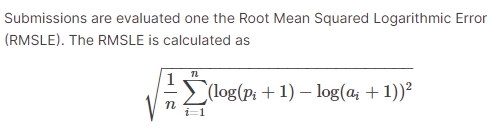

평가지표 계산함수 작성

In [92]:
import numpy as np
def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output

In [93]:
from sklearn.linear_model import LinearRegression
linear_reg_model =  LinearRegression()

In [99]:
log_y = np.log(y)
linear_reg_model.fit(X_train, log_y)
preds = linear_reg_model.predict(X_train)

In [101]:
log_y.shape, preds.shape


((10885,), (10885,))

In [102]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds,True): .4f}')

선형 회귀의 RMSLE 값 :  1.0205


예측한 값은 count 값이 아닌 log(count)이기 때문에 지수변환을 해 줘야 함

In [104]:
linearreg_preds = linear_reg_model.predict(X_test)
np.exp(linearreg_preds)

array([ 11.36239802,  13.60178871,  15.084417  , ..., 140.11446305,
       169.34534711, 163.86682443])

성능개선
  - 릿지 : L2 제곱
  - 라쏘 : L1 절대값
  - 랜덤포레스트

In [105]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [106]:
ridge_model = Ridge()

In [107]:
ridge_params = {
    'max_iter':[3000],
    'alpha' : [0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]
    }
# 교차 검증용 평가함수
rmsle_score = metrics.make_scorer(rmsle,greater_is_better=False)

In [108]:
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                              param_grid=ridge_params,
                              scoring=rmsle_score,
                              cv=5)

In [109]:
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [110]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds,True): .4f}')

선형 회귀의 RMSLE 값 :  1.0205


성능개선 : 라쏘회귀 모델

In [111]:
lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params = {
    'max_iter':[3000],
    'alpha' : lasso_alpha
}
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                              param_grid=lasso_params,
                              scoring=rmsle_score,
                              cv=5)
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds,True): .4f}')

선형 회귀의 RMSLE 값 :  1.0205


랜덤포레스트 모델

In [112]:
randomforest_model = RandomForestRegressor()
rf_params = {
    'random_state' : [42],
    'n_estimators' : [100,120,140]
    }
gridsearch_random_forest_model = GridSearchCV(randomforest_model,param_grid=rf_params,scoring=rmsle_score,cv=5)
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds,True): .4f}')

선형 회귀의 RMSLE 값 :  0.1127
